<a href="https://colab.research.google.com/github/venkatvalluri2004/Cognifyz-Technologies_Task/blob/main/2Cognifyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
import warnings as war
war.filterwarnings('ignore')


In [4]:
df = pd.read_csv('Restaurant.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


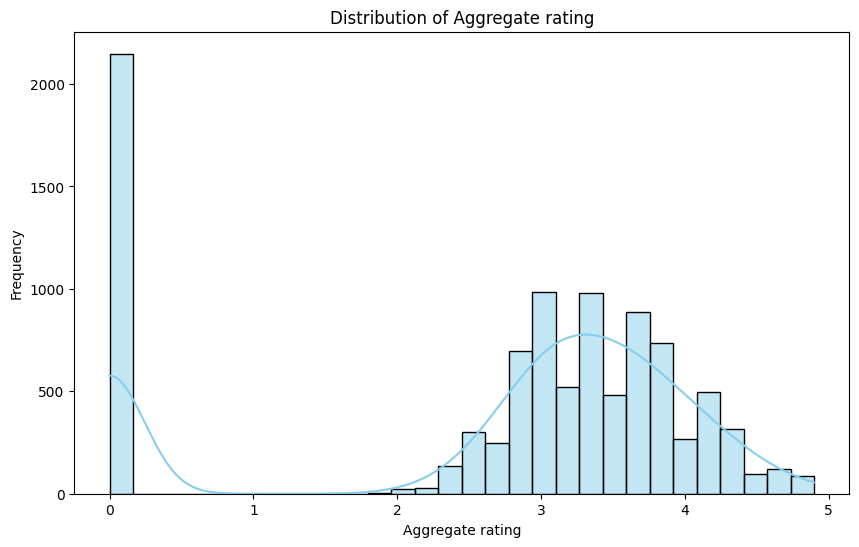

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Aggregate rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.show()

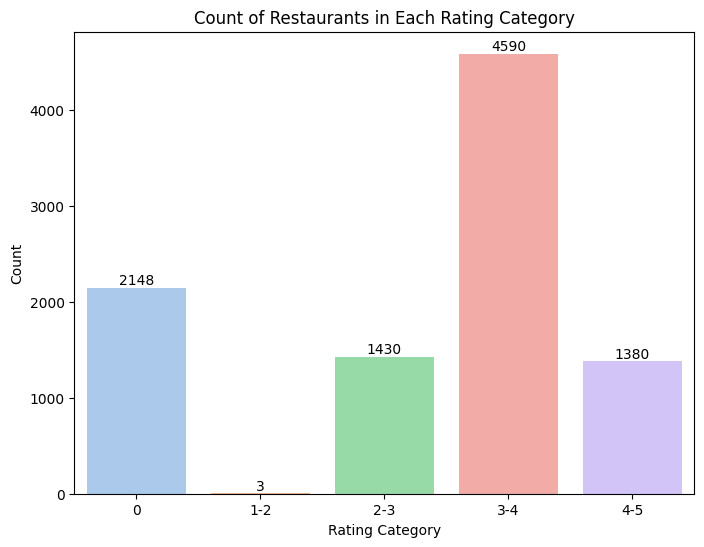

In [8]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0', '1-2', '2-3', '3-4', '4-5']

rating_category = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, right=False)

rating_counts = rating_category.value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette='pastel', legend=False)

for i, count in enumerate(rating_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')

plt.title('Count of Restaurants in Each Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()

In [9]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [10]:
df = df.assign(Cuisines = df['Cuisines'].fillna('Unknown'))
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [11]:
x = df.drop('Aggregate rating' , axis=1)
y = df['Aggregate rating']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [13]:
print("Training set shape:",x_train.shape)
print("Testing set shape:",x_test.shape)

Training set shape: (7640, 20)
Testing set shape: (1911, 20)


In [14]:
df = df.dropna(subset=['Cuisines', 'Average Cost for two', 'Aggregate rating'])
df.fillna({'Restaurant Name': 'Unknown', 'City': 'Unknown'}, inplace=True)

In [15]:
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(",")[0])

In [16]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,Japanese,...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,Japanese,...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml? Gurme,208,Istanbul,"Kemanke? Karamustafa Pa?a Mahallesi, R?ht?m Ca...",Karak?y,"Karak?y, Istanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A?ac?,208,Istanbul,"Ko?uyolu Mahallesi, Muhittin ?st?nda? Caddesi,...",Ko?uyolu,"Ko?uyolu, Istanbul",29.041297,41.009847,World Cuisine,...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,Istanbul,"Kuru?e?me Mahallesi, Muallim Naci Caddesi, No ...",Kuru?e?me,"Kuru?e?me, Istanbul",29.034640,41.055817,Italian,...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A??k Kahve,208,Istanbul,"Kuru?e?me Mahallesi, Muallim Naci Caddesi, No ...",Kuru?e?me,"Kuru?e?me, Istanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [17]:
df['Cuisines'].unique()

array(['French', 'Japanese', 'Seafood', 'Chinese', 'Asian', 'European',
       'Filipino', 'American', 'Korean', 'Cafe', 'Italian', 'Fast Food',
       'Bakery', 'Brazilian', 'Pizza', 'Arabian', 'Bar Food', 'Mexican',
       'International', 'Peruvian', 'Desserts', 'Juices', 'Beverages',
       'Lebanese', 'Burger', 'Steak', 'Indian', 'Sushi', 'BBQ',
       'Gourmet Fast Food', 'Unknown', 'Coffee and Tea', 'Southern',
       'Breakfast', 'Sandwich', 'German', 'Vietnamese', 'Thai',
       'Modern Australian', 'Latin American', 'Mediterranean', 'Tea',
       'Greek', 'Spanish', 'Hawaiian', 'Irish', 'New American',
       'Caribbean', 'Cajun', 'Pub Food', 'Tapas', 'Singaporean',
       'Western', 'Finger Food', 'British', 'Cuban', 'Australian',
       'Turkish', 'Pakistani', 'Continental', 'Goan', 'South Indian',
       'African', 'North Indian', 'Rajasthani', 'Mughlai', 'Ice Cream',
       'Street Food', 'Mithai', 'Maharashtrian', 'Modern Indian',
       'Biryani', 'Parsi', 'Raw Meats', 

In [18]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras?lia', 'Rio de Janeiro', 'S?o Paulo', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Miller', 'Monroe', 'Montville', 'Ojo Caliente', 'Orlando',
       'Palm Cove', 'Paynesville', 'Penola', 'Pensacola',
       'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham 

In [19]:
df['Price range'].unique()

array([3, 4, 2, 1])

In [20]:
encoder = OneHotEncoder()
cuisine_encoded = encoder.fit_transform(df[['Cuisines']]).toarray()
cuisine_df = pd.DataFrame(cuisine_encoded, columns=encoder.get_feature_names_out(['Cuisines']))

In [21]:
scaler = MinMaxScaler()
df[['Average Cost for two', 'Aggregate rating']] = scaler.fit_transform(df[['Average Cost for two', 'Aggregate rating']])
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),Yes,No,No,No,3,0.979592,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,0.918367,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,Botswana Pula(P),Yes,No,No,No,4,0.897959,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,Japanese,...,Botswana Pula(P),No,No,No,No,4,1.000000,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,Japanese,...,Botswana Pula(P),Yes,No,No,No,4,0.979592,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml? Gurme,208,Istanbul,"Kemanke? Karamustafa Pa?a Mahallesi, R?ht?m Ca...",Karak?y,"Karak?y, Istanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,0.836735,Green,Very Good,788
9547,5908749,Ceviz A?ac?,208,Istanbul,"Ko?uyolu Mahallesi, Muhittin ?st?nda? Caddesi,...",Ko?uyolu,"Ko?uyolu, Istanbul",29.041297,41.009847,World Cuisine,...,Turkish Lira(TL),No,No,No,No,3,0.857143,Green,Very Good,1034
9548,5915807,Huqqa,208,Istanbul,"Kuru?e?me Mahallesi, Muallim Naci Caddesi, No ...",Kuru?e?me,"Kuru?e?me, Istanbul",29.034640,41.055817,Italian,...,Turkish Lira(TL),No,No,No,No,4,0.755102,Yellow,Good,661
9549,5916112,A??k Kahve,208,Istanbul,"Kuru?e?me Mahallesi, Muallim Naci Caddesi, No ...",Kuru?e?me,"Kuru?e?me, Istanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,0.816327,Green,Very Good,901


In [22]:
df = pd.concat([df, cuisine_df], axis=1)
df.drop(columns=['Cuisines'], inplace=True)

In [23]:
features = ['Average Cost for two', 'Aggregate rating'] + list(cuisine_df.columns)
restaurant_matrix = df[features].values
similarity_matrix = cosine_similarity(restaurant_matrix)

In [24]:
similarity_matrix = cosine_similarity(restaurant_matrix)
similarity_matrix

array([[1.        , 0.47333515, 0.46754086, ..., 0.42168915, 0.44252421,
        0.44252415],
       [0.47333515, 1.        , 0.45192405, ..., 0.40760339, 0.42774248,
        0.42774242],
       [0.46754086, 0.45192405, 1.        , ..., 0.40261197, 0.42250428,
        0.42250405],
       ...,
       [0.42168915, 0.40760339, 0.40261197, ..., 1.        , 0.38107177,
        0.38107176],
       [0.44252421, 0.42774248, 0.42250428, ..., 0.38107177, 1.        ,
        0.39990003],
       [0.44252415, 0.42774242, 0.42250405, ..., 0.38107176, 0.39990003,
        1.        ]])

In [25]:
user_preferences = {}
user_preferences['Cuisines'] = input("Enter your favourite cuisine: ")
user_preferences['Price range'] = input("Enter your price range: ")
user_preferences['City'] = input("Enter your city: ")

Enter your favourite cuisine: French
Enter your price range: 3
Enter your city: Goa


In [26]:
required_columns = ['Cuisines', 'Price range', 'City']

In [27]:
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {', '.join(missing_columns)}")
else:
    encoded_preferences = np.array([
        label_encoders[col].transform([user_preferences[col]])[0] for col in required_columns
    ]).reshape(1, -1)
    print("Encoded Preferences:", encoded_preferences)

Missing columns: Cuisines


In [37]:
recommended_restaurants = content_based_recommendation(user_preferences, df, similarity_matrix)
print("Recommended Restaurants:", recommended_restaurants)

NameError: name 'content_based_recommender' is not defined

In [30]:
restaurant_features = df[['Cuisines', 'Price range', 'City']].values
similarities = cosine_similarity(encoded_preferences, restaurant_features)
top_indices = similarities.argsort()[0][-5:][::-1]
    recommended_restaurants = df.iloc[top_indices]['Restaurant Name'].values

    print("Top recommended restaurants:", recommended_restaurants)

IndentationError: unexpected indent (<ipython-input-30-d7f889381c75>, line 4)